## Pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from statisticaltools import InterCumulSamp
from statisticaltools import Statisticaltools1
from statisticaltools import Statisticaltools2
from scipy import special 

pi = np.pi
exp = np.exp
Erf = special.erf

## Conjuntos de dados

In [2]:
#Constants:
sigma = 1.0
mi = 4
mi_gauss = 0.0

#Range and points:
n = 100 #number of points
bins = 10 #number of bins

#Spaces
x = np.linspace(-5, 5.0, num=n)
x_dist3 = np.linspace(1,7,num=n)
s_list =np.random.uniform(0.0, 1.0, n)



## Distribuições

In [3]:
# Distribuição uniforme

uniform = np.random.uniform(0,1,n) #pontos da distribuição uniforme

#Distribuição normal

#Função gaussiana:
def gauss (x):
    g =[]
        
    for j in range(0,len(x)): 
                
        g_i =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow ((x[j] - mi_gauss) / sigma, 2.0))
        
        g.append(g_i)
    return g

normal = gauss(x)

# Terceira Distribuição

def dist3 (x):
    g =[]
    for j in range(0,len(x)): 
        g_j =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] - mi) / sigma), 2.0))
        g_i=  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] + mi) / sigma), 2.0))
        a = Erf(mi / pow(2*sigma, 0.5))
        
        d = (g_j - g_i) / a
                
        g.append(d)
        
    return g

dist_3 = dist3 (x_dist3)

### 1) a) Amostras de N pontos das distribuições:

In [4]:
# Uniform:
#amostras dadas por uniform = np.random.uniform(0,1,n)

# Normal:
normal_dist = InterCumulSamp(normal, x)
normal_points = normal_dist.sampler_list_points(s_list)

#Distribuição 3:
terceira_dist = InterCumulSamp(dist_3, x)
ter_points = terceira_dist.sampler_list_points(s_list)


### b) Binagem

<Figure size 432x288 with 0 Axes>

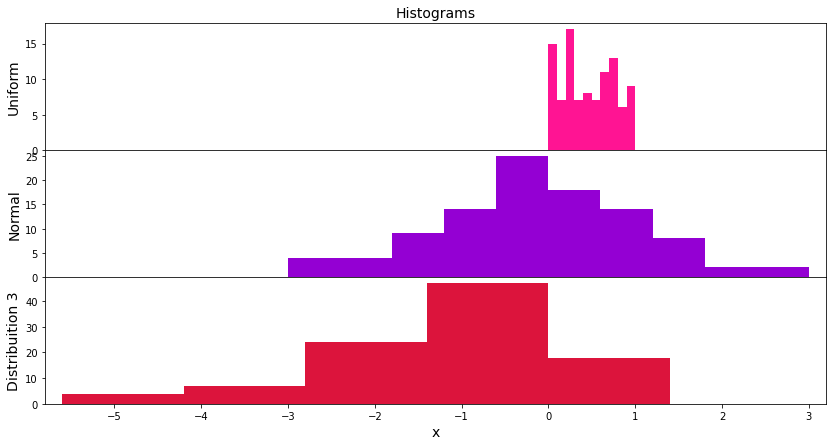

In [5]:
plt.figure()
fig, axs = plt.subplots (3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(14,7))

axs[0].hist(uniform, bins,[0.0, 1.0], color='deeppink') #histograma da uniforme
axs[1].hist(normal_points, bins, [-3.0, 3.0], color='darkviolet') #histograma da normal
axs[2].hist(ter_points, bins, [-7, 7], color='crimson') #histograma da terceira distribuição

axs[2].set_xlabel('x', fontsize=14)

axs[0].set_ylabel('Uniform', fontsize=14)
axs[1].set_ylabel('Normal', fontsize=14)
axs[2].set_ylabel('Distribuition 3', fontsize=14)

axs[0].set_title('Histograms', fontsize=14)
plt.xlim([-5.8, 3.2])

plt.show ()

In [6]:
#Numero de pontos em cada bin para as distribuições:

#Uniforme
uniform_bins_number = np.histogram(uniform, bins)[0]

#Normal
normal_bins_number = np.histogram(normal_points, bins)[0]

#Distribuition 3
dist3_bins_number = np.histogram(ter_points, bins)[0]

print(uniform_bins_number, normal_bins_number, dist3_bins_number)

[17  7 15  7  7  8 11 13  5 10] [ 6  2 10 13 19 18 14 12  2  4] [ 5  1  3  7  7 10 15 15 17 20]


In [7]:
#Cumulativas

#Normal
normal_cumulativa = normal_dist.cumulative_all_points()

#Distribuição 3
dist3_cumulativa = terceira_dist.cumulative_all_points()


In [8]:
# Valor esperado de pontos em cada subintervalo

n_normal = []
for a in range (0, len(normal_bins_number)-1):
    ni = normal_bins_number[a] * normal_cumulativa[a+1][0]
    n_normal.append(ni)
    

## 2) Média e Variancia para Distribuição Gaussiana

In [10]:
#Média
n = Statisticaltools1(normal_points)
normal_media = n.media_aritmetica()
print(normal_media)

-0.12133958466147005


In [10]:
#Variância
normal_var = n.variance()
print(normal_var)

1.1588026629794175
